In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import ensemble, tree, linear_model
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [30]:
cmap = sns.color_palette("plasma", as_cmap=True)
sns.set_style("whitegrid")

https://notebook.community/mwee/BeerRecommender/Recommender

Initial exploration of the data

In [7]:
df = pd.read_csv('beer_reviews.csv')
df.head(5).transpose()

,0,1,2,3,4
index,0,1,2,3,4
brewery_id,10325,10325,10325,10325,1075
brewery_name,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Caldera Brewing Company
review_time,1234817823,1235915097,1235916604,1234725145,1293735206
review_overall,1.50,3.00,3.00,3.00,4.00
review_aroma,2.00,2.50,2.50,3.00,4.50
review_appearance,2.50,3.00,3.00,3.50,4.00
review_profilename,stcules,stcules,stcules,stcules,johnmichaelsen
beer_style,Hefeweizen,English Strong Ale,Foreign / Export Stout,German Pilsener,American Double / Imperial IPA
review_palate,1.50,3.00,3.00,2.50,4.00


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1586614.00,793306.50,458016.15,0.00,396653.25,793306.50,1189959.75,1586613.00
brewery_id,1586614.00,3130.10,5578.10,1.00,143.00,429.00,2372.00,28003.00
review_time,1586614.00,1224089280.01,76544274.54,840672001.00,1173224188.25,1239202881.50,1288568405.25,1326285348.00
review_overall,1586614.00,3.82,0.72,0.00,3.50,4.00,4.50,5.00
review_aroma,1586614.00,3.74,0.70,1.00,3.50,4.00,4.00,5.00
review_appearance,1586614.00,3.84,0.62,0.00,3.50,4.00,4.00,5.00
review_palate,1586614.00,3.74,0.68,1.00,3.50,4.00,4.00,5.00
review_taste,1586614.00,3.79,0.73,1.00,3.50,4.00,4.50,5.00
beer_abv,1518829.00,7.04,2.32,0.01,5.20,6.50,8.50,57.70
beer_beerid,1586614.00,21712.79,21818.34,3.00,1717.00,13906.00,39441.00,77317.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [10]:
df.describe()

,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1518829.00,1586614.00
mean,793306.50,3130.10,1224089280.01,3.82,3.74,3.84,3.74,3.79,7.04,21712.79
std,458016.15,5578.10,76544274.54,0.72,0.70,0.62,0.68,0.73,2.32,21818.34
min,0.00,1.00,840672001.00,0.00,1.00,0.00,1.00,1.00,0.01,3.00
25%,396653.25,143.00,1173224188.25,3.50,3.50,3.50,3.50,3.50,5.20,1717.00
50%,793306.50,429.00,1239202881.50,4.00,4.00,4.00,4.00,4.00,6.50,13906.00
75%,1189959.75,2372.00,1288568405.25,4.50,4.00,4.00,4.00,4.50,8.50,39441.00
max,1586613.00,28003.00,1326285348.00,5.00,5.00,5.00,5.00,5.00,57.70,77317.00


In [11]:
df.shape

(1586614, 14)

In [12]:
# df.beer_style.unique()

Some data cleaning

In [13]:
# df[["beer_style1", "beer_style2"]] = df["beer_style"].str.split("/", expand=True)

In [14]:
# df.transpose()

In [15]:
# df.drop(['index', 'review_time', 'beer_style'], axis='columns', inplace=True)

In [16]:
numeric = df.select_dtypes(include=[np.number])
numeric.columns

Index(['index', 'brewery_id', 'review_time', 'review_overall', 'review_aroma',
       'review_appearance', 'review_palate', 'review_taste', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [17]:
categorical = df.select_dtypes(include=[np.object_])
categorical.columns

Index(['brewery_name', 'review_profilename', 'beer_style', 'beer_name'], dtype='object')

EDA

There are 5,840 breweries and 66,055 beers represented in this dataset. The top breweries are familiar but we were expecting to see Coors, Miller, Budlight etc... These breweries are in the dataset, just not reviewed as much. Good to know the dataset does have a slight bias towards craft beers. 

In [18]:
# Most Reviews Breweries
brew = pd.DataFrame(df.groupby(['brewery_name'])['review_overall'].count().reset_index(name="num_reviews").sort_values('num_reviews', ascending=False))
brew.head(10)

,brewery_name,num_reviews
701,Boston Beer Company (Samuel Adams),39444
1963,Dogfish Head Brewery,33839
4950,Stone Brewing Co.,33066
4743,Sierra Nevada Brewing Co.,28751
413,"Bell's Brewery, Inc.",25191
4489,Rogue Ales,24083
2262,Founders Brewing Company,20004
5448,Victory Brewing Company,19479
3189,Lagunitas Brewing Company,16837
235,Avery Brewing Company,16107


In [19]:
# Most Reviews Beers
beer = pd.DataFrame(df.groupby(['beer_name', 'brewery_name'])['review_overall'].count().reset_index(name="num_reviews").sort_values('num_reviews', ascending=False))
beer.head(10)

,beer_name,brewery_name,num_reviews
942,90 Minute IPA,Dogfish Head Brewery,3290
42836,Old Rasputin Russian Imperial Stout,North Coast Brewing Co.,3111
53365,Sierra Nevada Celebration Ale,Sierra Nevada Brewing Co.,3000
60761,Two Hearted Ale,"Bell's Brewery, Inc.",2728
3645,Arrogant Bastard Ale,Stone Brewing Co.,2704
56423,Stone Ruination IPA,Stone Brewing Co.,2704
53381,Sierra Nevada Pale Ale,Sierra Nevada Brewing Co.,2587
56380,Stone IPA (India Pale Ale),Stone Brewing Co.,2575
46113,Pliny The Elder,Russian River Brewing Company,2527
22477,Founders Breakfast Stout,Founders Brewing Company,2502


How many reviews do beers typiclally get. Thinking forward about the recsys, we want to depend more on well rounded reviews, rather than a beer that has a great rating, but from only one review. This will help us decide where to cut off the outliers in our data before building the recsys.

In [20]:
# df of reviews per unique beer
reviews_per_beer = df.groupby(['beer_beerid', 'beer_name'])['beer_name'].count().reset_index(name='n')
reviews_per_beer = reviews_per_beer.sort_values('n', ascending=False)
reviews_per_beer.head()

,beer_beerid,beer_name,n
1783,2093,90 Minute IPA,3290
367,412,Old Rasputin Russian Imperial Stout,3111
1621,1904,Sierra Nevada Celebration Ale,3000
934,1093,Two Hearted Ale,2728
3414,4083,Stone Ruination IPA,2704


In [21]:
# df of mean and median for easy plot labeling
review_mean = reviews_per_beer['n'].agg([np.mean])
review_median = reviews_per_beer['n'].agg([np.median])
# review_measures = reviews_per_beer['n'].agg([np.mean, np.median]).reset_index().rename(columns={"mean":"Mean", "median":"Median"})
# review_measures.head()

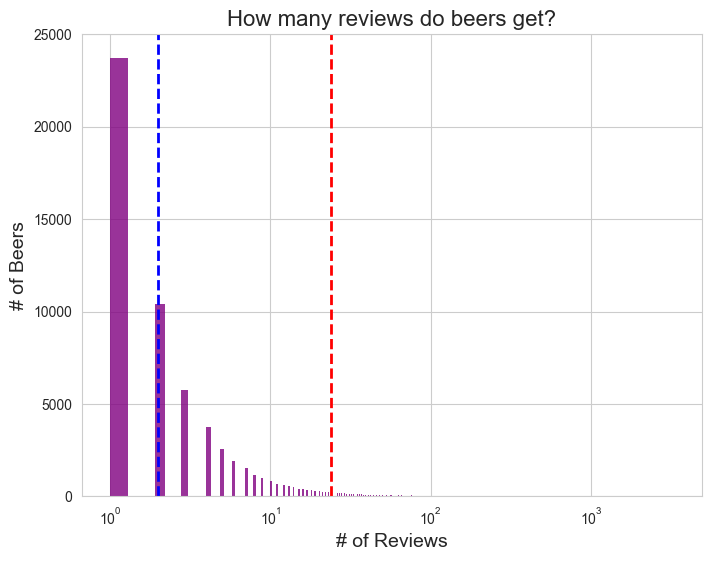

In [122]:
# plot histogram of number of reviews per beer
plt.figure(figsize=(8, 6))
sns.histplot(data=reviews_per_beer, x='n', alpha=.8, color='purple')
plt.xscale('log')
plt.xlabel('# of Reviews', fontsize=14)
plt.ylabel('# of Beers', fontsize=14)
plt.title('How many reviews do beers get?', fontsize=16)

#plot mean and median lines
plt.vlines(x=[review_mean], ymin=0, ymax=len(reviews_per_beer), colors='red', ls='--', lw=2, label='mean')
plt.vlines(x=[review_median], ymin=0, ymax=len(reviews_per_beer),colors='blue', ls='--', lw=2, label='median')

# adjust y axis limits and format tick labels
plt.ylim(0, 25000)

plt.show()


Looks like most beers dont get many reviews. The median is 2 and mean is 24.

Does the style of beer matter? Assumption is yes but lets try to prove this with eda. Are certain styles consistent? There are several styles that are very popular and some that are obscure.

In [23]:
# top styles
df.groupby('beer_style').size().reset_index(name='count').sort_values('count', ascending=False).head()

,beer_style,count
12,American IPA,117586
9,American Double / Imperial IPA,85977
14,American Pale Ale (APA),63469
89,Russian Imperial Stout,54129
11,American Double / Imperial Stout,50705


In [24]:
# bottom styles
df.groupby('beer_style').size().reset_index(name='count').sort_values('count', ascending=True).head()

,beer_style,count
64,Happoshu,241
72,Kvass,297
88,Roggenbier,466
56,Faro,609
62,Gose,686


The most reviewed beer styles are ones that are familiar. the least reviewed are a bit more obscure.. as we suspected. But lets take a look at their overall review score - is this related to the number of reviews it gets? more eda....

In [25]:
# Compute the average score and number of reviews for each beer style
avg_by_style = df.groupby('beer_style').agg(avg_score=('review_overall', 'mean'), reviews=('review_overall', 'count'))
avg_by_style = avg_by_style.reset_index().sort_values('avg_score', ascending=False)
avg_by_style.head()

,beer_style,avg_score,reviews
20,American Wild Ale,4.09,17794
63,Gueuze,4.09,6009
86,Quadrupel (Quad),4.07,18086
75,Lambic - Unblended,4.05,1114
11,American Double / Imperial Stout,4.03,50705


In [26]:
# getting top and bottom styles and concat 
top_5 = avg_by_style.nlargest(5, 'avg_score')
bot_5 = avg_by_style.nsmallest(5, 'avg_score')

top_bot_5 = pd.concat([top_5, bot_5])
top_bot_5

,beer_style,avg_score,reviews
20,American Wild Ale,4.09,17794
63,Gueuze,4.09,6009
86,Quadrupel (Quad),4.07,18086
75,Lambic - Unblended,4.05,1114
11,American Double / Imperial Stout,4.03,50705
77,Low Alcohol Beer,2.58,1201
13,American Malt Liquor,2.68,3925
76,Light Lager,2.70,14311
54,Euro Strong Lager,2.86,2724
64,Happoshu,2.91,241


It seems some of the higher rated beer styles have a lot more reviews than the lower rated beer styles. This correlation is interesting. Although its not linear relationship so lets explore the variance within these features.

In [87]:
# 1st approach - group by unique beers and styles, average the score of each beer - resulting in an average of all all unique beers in that specific style. 
df2 = df.groupby(['beer_beerid', 'beer_style']).agg(reviews=('review_overall', 'count'), avg_score=('review_overall', 'mean'))
df2 = df2.reset_index().sort_values('reviews', ascending=False)
df2

,beer_beerid,beer_style,reviews,avg_score
1783,2093,American Double / Imperial IPA,3290,4.15
367,412,Russian Imperial Stout,3111,4.17
1621,1904,American IPA,3000,4.17
934,1093,American IPA,2728,4.33
3414,4083,American Double / Imperial IPA,2704,4.16
...,...,...,...,...
35625,43345,Scotch Ale / Wee Heavy,1,3.50
35624,43344,English Brown Ale,1,3.50
35621,43340,American Pale Ale (APA),1,4.50
35612,43331,Herbed / Spiced Beer,1,3.00


In [88]:
import scipy.stats as stats

# Filter beers with atleast 30 reviews
df2_filtered = df2[df2['reviews'] >= 30]

# count num beers in each style remaining after filtering
style_counts = df2_filtered['beer_style'].value_counts()
selected_styles = style_counts[style_counts >= 30].index

df2_filtered = df2_filtered[df2_filtered['beer_style'].isin(selected_styles)]

# group by beer style and generate confidence intervals
df2 = (df2_filtered
        .groupby('beer_style')
        .apply(lambda x: stats.t.interval(alpha=0.95, df=len(x)-1, loc=x['avg_score'].mean(), scale=stats.sem(x['avg_score'])))
        .apply(pd.Series)
        .rename(columns={0:'CI_low', 1:'CI_high'}))
df2.index.name = 'beer_style'
df2['CI_med'] = df2[['CI_low', 'CI_high']].mean(axis=1)
df2.reset_index(inplace=True)

df2

C:\Users\epwol\AppData\Local\Temp\ipykernel_29648\1557120491.py:15: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  .apply(lambda x: stats.t.interval(alpha=0.95, df=len(x)-1, loc=x['avg_score'].mean(), scale=stats.sem(x['avg_score'])))


,beer_style,CI_low,CI_high,CI_med
0,Altbier,3.74,3.87,3.81
1,American Adjunct Lager,2.91,3.04,2.97
2,American Amber / Red Ale,3.64,3.72,3.68
3,American Amber / Red Lager,3.44,3.65,3.54
4,American Barleywine,3.84,3.92,3.88
...,...,...,...,...
68,Tripel,3.77,3.85,3.81
69,Vienna Lager,3.54,3.73,3.63
70,Weizenbock,3.84,3.98,3.91
71,Winter Warmer,3.66,3.76,3.71


In [98]:
# get top 15 and bottom 15 styles
top_15 = df2.nlargest(15, 'CI_med')
bot_15 = df2.nsmallest(15, 'CI_med')

# combine to a df
df2_hilo = pd.concat([top_15, bot_15]).sort_values('CI_med', ascending=True)
df2_hilo

,beer_style,CI_low,CI_high,CI_med
12,American Malt Liquor,2.37,2.75,2.56
52,Light Lager,2.62,2.85,2.74
1,American Adjunct Lager,2.91,3.04,2.97
40,Euro Pale Lager,3.11,3.25,3.18
14,American Pale Lager,3.29,3.49,3.39
43,Fruit / Vegetable Beer,3.32,3.46,3.39
47,Herbed / Spiced Beer,3.36,3.58,3.47
39,Euro Dark Lager,3.34,3.63,3.48
15,American Pale Wheat Ale,3.47,3.60,3.54
3,American Amber / Red Lager,3.44,3.65,3.54


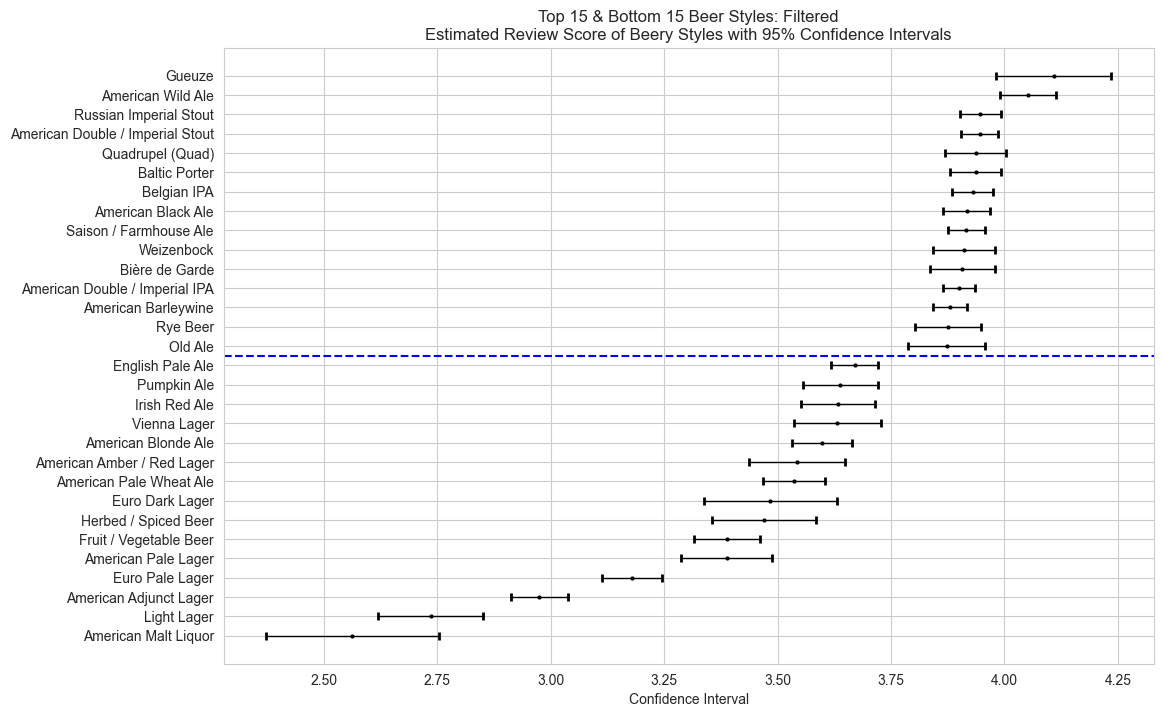

In [105]:
fig, ax = plt.subplots(figsize=(12,8))

y_pos = range(len(df2_hilo))

ax.errorbar(x=df2_hilo['CI_med'], y=y_pos, xerr=[df2_hilo['CI_med']-df2_hilo['CI_low'], df2_hilo['CI_high']-df2_hilo['CI_med']],
            fmt='none', capsize=3, elinewidth=1, markeredgewidth=2, ecolor='black')

ax.plot(df2_hilo['CI_med'], y_pos, 'o', markersize=2, markeredgecolor='black', markerfacecolor='black')

# add y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df2_hilo['beer_style'])

# add x-axis label and title
ax.set_xlabel('Confidence Interval')
ax.set_title('Top 15 & Bottom 15 Beer Styles: Filtered\nEstimated Review Score of Beery Styles with 95% Confidence Intervals')

# add horizontal line to visualize top and bottom beers categorized earlier. 
line_y_pos = y_pos[14] + 0.5
ax.axhline(y=line_y_pos, linestyle='--', color='blue')

plt.show()


The results are interesting. Noting which styles have more variance than the others. 

- Picking an imperial stout or ipa seems to generate more confidence on how 'good' it is if it were picked. In english - If i pick one of these beers it will most likely be good.

- Old ale or Gueuze seem to have more variation - interesting. In english - If i pick one of these beers, it might be really good or just ok. 
- The bottom portions seems to have more variance  in the intervals themselves. The top beers ranged about .1 points were the bottom beers are ranging .2 to .3 points.
- In english - If i pick one of these beers, Im not very sure if it will be any good, or worth drinking. 

Final thoughts on the filtering approach:
- Clear bias
- lots of beers filtered out. 

Lets try this again but without filtering beers that have atleast 30 reviews.

In [94]:
# Assign a unique identifier to each review first
df3 = df.assign(unique_id = range(len(df))) \
    .assign(avg_score = df['review_overall']) \
    .loc[:, ['unique_id', 'beer_style', 'avg_score', 'beer_beerid']]
df3

,unique_id,beer_style,avg_score,beer_beerid
0,0,Hefeweizen,1.50,47986
1,1,English Strong Ale,3.00,48213
2,2,Foreign / Export Stout,3.00,48215
3,3,German Pilsener,3.00,47969
4,4,American Double / Imperial IPA,4.00,64883
...,...,...,...,...
1586609,1586609,Pumpkin Ale,5.00,33061
1586610,1586610,Pumpkin Ale,4.00,33061
1586611,1586611,Pumpkin Ale,4.50,33061
1586612,1586612,Pumpkin Ale,4.00,33061


In [95]:
# generate the conf intervals on the reviewid data
df3 = (df3
        .groupby('beer_style')
        .apply(lambda x: stats.t.interval(alpha=0.95, df=len(x)-1, loc=x['avg_score'].mean(), scale=stats.sem(x['avg_score'])))
        .apply(pd.Series)
        .rename(columns={0:'CI_low', 1:'CI_high'}))
df3.index.name = 'beer_style'
df3['CI_med'] = df3[['CI_low', 'CI_high']].mean(axis=1)
df3.reset_index(inplace=True)

df3

C:\Users\epwol\AppData\Local\Temp\ipykernel_29648\3957571054.py:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  .apply(lambda x: stats.t.interval(alpha=0.95, df=len(x)-1, loc=x['avg_score'].mean(), scale=stats.sem(x['avg_score'])))


,beer_style,CI_low,CI_high,CI_med
0,Altbier,3.81,3.84,3.82
1,American Adjunct Lager,2.99,3.01,3.00
2,American Amber / Red Ale,3.77,3.79,3.78
3,American Amber / Red Lager,3.55,3.58,3.56
4,American Barleywine,3.89,3.90,3.90
...,...,...,...,...
99,Vienna Lager,3.75,3.78,3.76
100,Weizenbock,4.00,4.02,4.01
101,Wheatwine,3.79,3.84,3.82
102,Winter Warmer,3.69,3.71,3.70


In [97]:
# get top 15 and bottom 15 styles
top_15 = df3.nlargest(15, 'CI_med')
bot_15 = df3.nsmallest(15, 'CI_med')

# combine to a df
df3_hilo = pd.concat([top_15, bot_15]).sort_values('CI_med', ascending=True)
df3_hilo

,beer_style,CI_low,CI_high,CI_med
77,Low Alcohol Beer,2.52,2.64,2.58
13,American Malt Liquor,2.65,2.71,2.68
76,Light Lager,2.68,2.72,2.70
54,Euro Strong Lager,2.83,2.90,2.86
64,Happoshu,2.79,3.04,2.91
1,American Adjunct Lager,2.99,3.01,3.00
34,Chile Beer,3.07,3.16,3.11
69,Japanese Rice Lager,3.08,3.16,3.12
53,Euro Pale Lager,3.19,3.21,3.20
72,Kvass,3.25,3.47,3.36


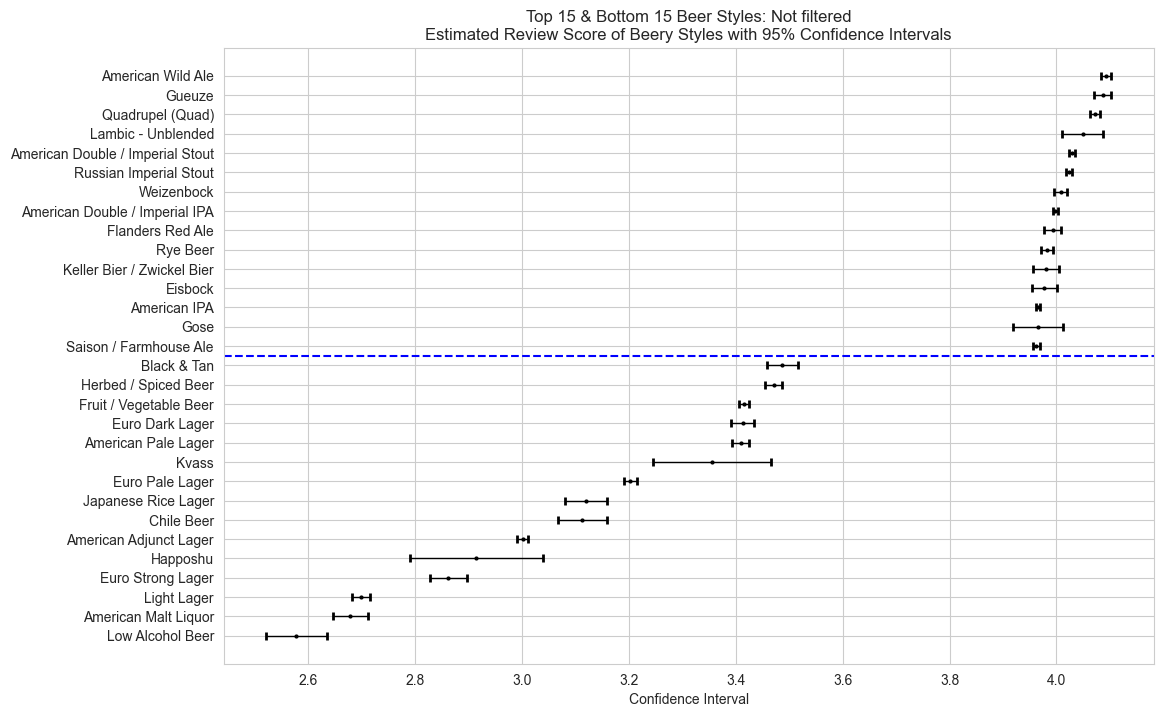

In [104]:
fig, ax = plt.subplots(figsize=(12,8))

y_pos = range(len(df3_hilo))

ax.errorbar(x=df3_hilo['CI_med'], y=y_pos, xerr=[df3_hilo['CI_med']-df3_hilo['CI_low'], df3_hilo['CI_high']-df3_hilo['CI_med']],
            fmt='none', capsize=3, elinewidth=1, markeredgewidth=2, ecolor='black')

ax.plot(df3_hilo['CI_med'], y_pos, 'o', markersize=2, markeredgecolor='black', markerfacecolor='black')


# add y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df3_hilo['beer_style'])

# add x-axis label and title
ax.set_xlabel('Confidence Interval')
ax.set_title('Top 15 & Bottom 15 Beer Styles: Not filtered\nEstimated Review Score of Beery Styles with 95% Confidence Intervals')

# add horizontal line to visualize top and bottom beers categorized earlier. 
line_y_pos = y_pos[14] + 0.5
ax.axhline(y=line_y_pos, linestyle='--', color='blue')

plt.show()

Results are similar to the first method. The styles in the top 15 have a much narrower CI than the other styles. With not filtering the reviews, the confidence data should be narrower, so this is expected. 

Also we see the addition of beer styles that were not present in the first method - also noting the new additions have wider confidence intervals - assuming since they have much less review data so less confidence to support. 

# So now we feel like we have a good idea of what our dataset entails.. moving on to building the recsys...

### Matrix Factorization

- First, we build a matrix with users(reviewers in this case) as the rows and items(beers) as the columns. Each cell is the rating that reviewer1 gave beer1, for example. 
- After this we will have empty cells for beers users havent reviews yet... We can use MF to predict what the values might be. 

The whole concept of matrix factorization works because we can take advantage of the fact that individuals don’t have 100% unique preferences. User preferences can be clustered - some users like hoppy beers, some dont etc.... We can use this concept to get an item - item similarity and user - user similarity to better reccomend beers! 

- We will be using gradient descent to solver for a user association matrix, P, and item association matrix, Q. Basically generating features about our reviewers. 

### Steps

1. Cleanup - Most reviewers don’t review many beers and most beers don’t get reviewed many times. We like a sparse matrix, but we don’t gain a lot of information from reviewers that review one time or beers than are only reviewed one time. We need to only include reviewers and beers above some threshold.


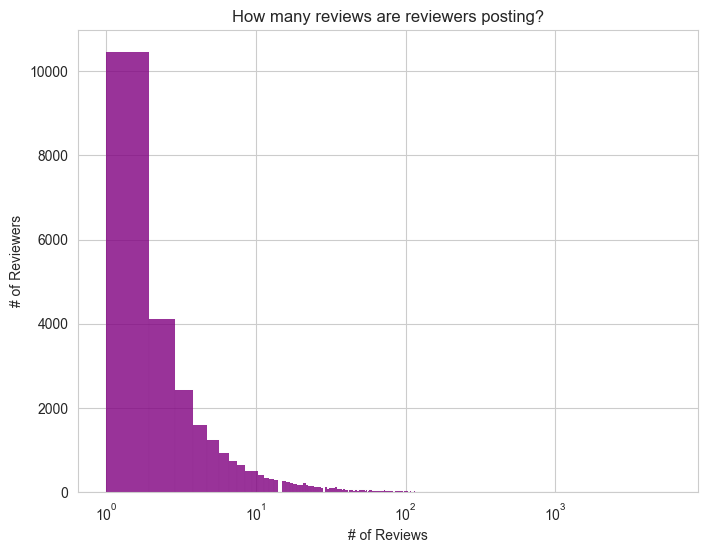

In [123]:
# Count the number of reviews per reviewer
reviews_per_reviewer = (df
                        .groupby('review_profilename')
                        .size()
                        .reset_index(name='n')
                        .sort_values('n', ascending=False))

# create plot
plt.figure(figsize=(8, 6))
sns.histplot(data=reviews_per_reviewer, x='n', color='purple', edgecolor='k', alpha=.8)
plt.xscale('log')
plt.xlabel('# of Reviews')
plt.ylabel('# of Reviewers')
plt.title('How many reviews are reviewers posting?')
plt.show()

In [125]:
# filtering the data to only include reviewers who have reviewed atleast 50 beers and only include beers with atleast 100 reviews. 
over_50_reviews = df.groupby(['review_profilename']).filter(lambda x: len(x) >= 50)
over_50_reviews = over_50_reviews.groupby(['beer_beerid']).filter(lambda x: len(x) >= 100)
over_50_reviews = over_50_reviews.dropna(subset=['beer_name', 'review_profilename', 'review_overall'])
over_50_reviews['user_id'] = pd.factorize(over_50_reviews['review_profilename'])[0] + 1
over_50_reviews['beer_id'] = pd.factorize(over_50_reviews['beer_beerid'])[0] + 1

user_beer_3d = over_50_reviews[['user_id', 'beer_id', 'review_overall']]
user_beer_3d

,user_id,beer_id,review_overall
10,1,1,3.00
18,2,1,2.50
30,3,1,3.00
40,4,1,3.00
63,5,2,4.00
...,...,...,...
1585926,1759,2882,4.50
1585927,1164,2882,4.00
1585928,2316,2882,4.50
1585929,2785,2882,5.00
